In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [2]:
df = pd.read_csv("D:/Data Science Project/Usecase3_Dataset.csv")
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [3]:
df.shape

(14640, 3)

In [4]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [5]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0, 0.5, 'No. of Tweets')

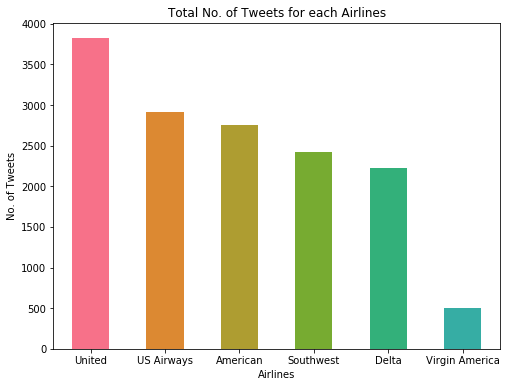

In [6]:
colors=sns.color_palette("husl", 10) 
pd.Series(df["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

Text(0, 0.5, 'No. of Tweets')

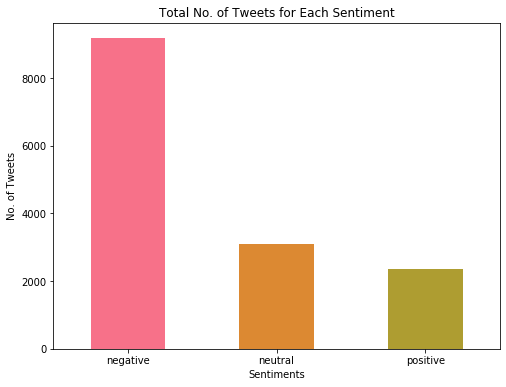

In [7]:
colors=sns.color_palette("husl", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind = "bar",
                                    color=colors,figsize=(8,6),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

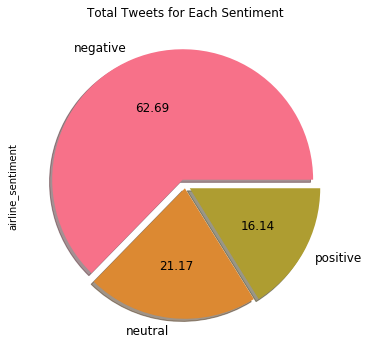

In [8]:
colors=sns.color_palette("husl", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

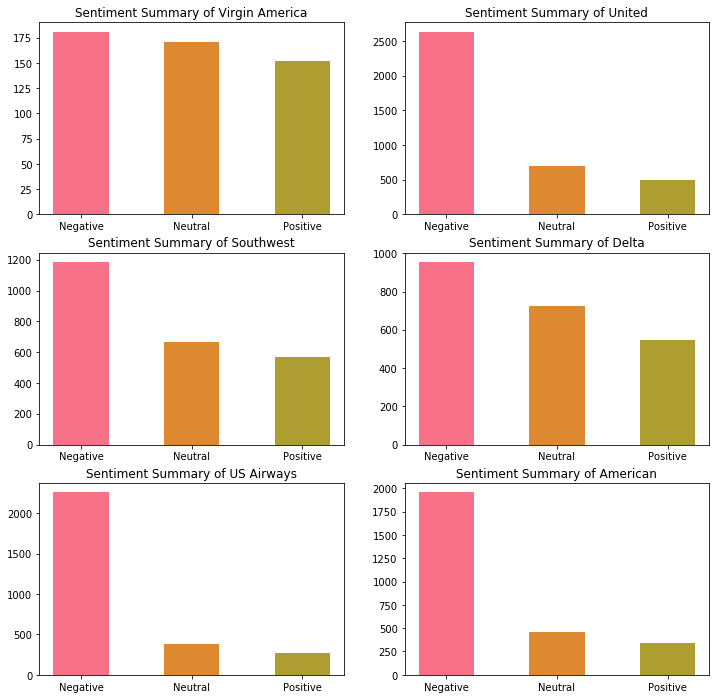

In [9]:
def plot_sub_sentiment(Airline):
    pdf = df[df['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = df['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [10]:
air_senti=pd.crosstab(df.airline, df.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [11]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


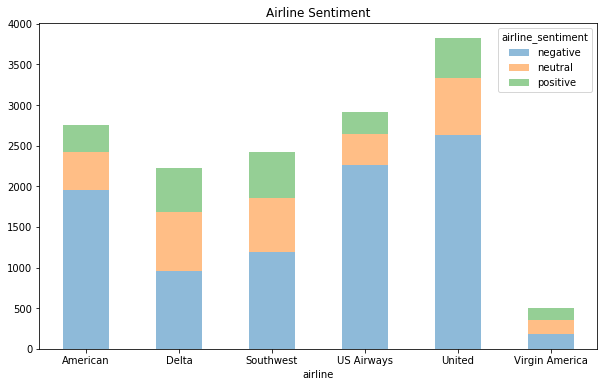

In [12]:
pd.crosstab(index = df["airline"],columns = df["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

In [13]:
pos_data=df[df['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

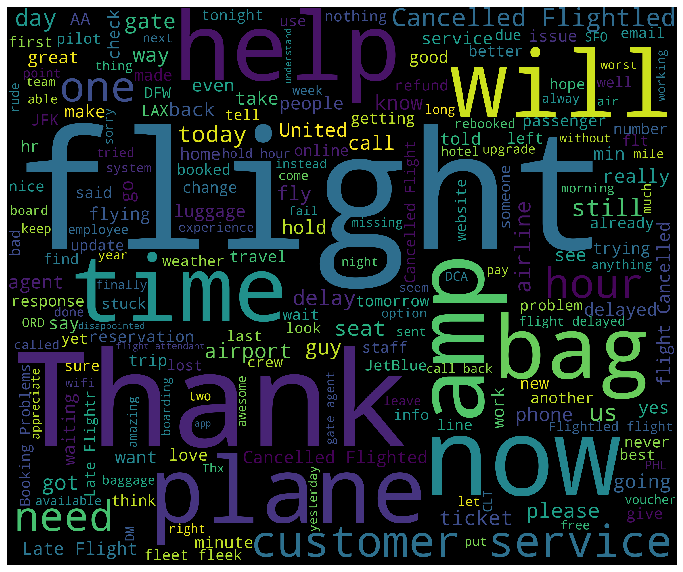

In [15]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
neg_data = df[df['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [17]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

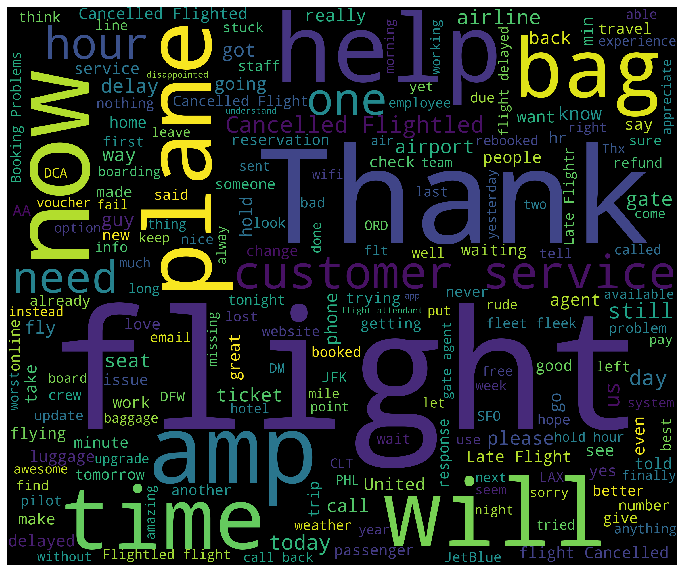

In [18]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
neu_data = df[df['airline_sentiment']=='neutral']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

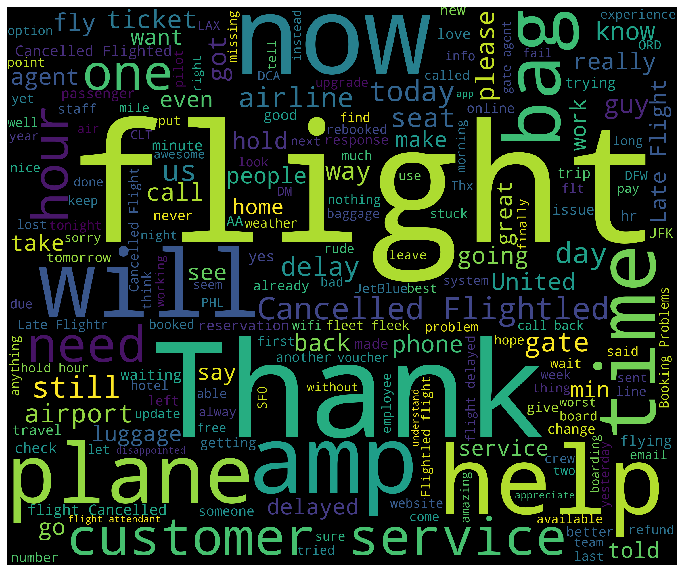

In [21]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
air_senti=pd.crosstab(df.airline, df.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [24]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


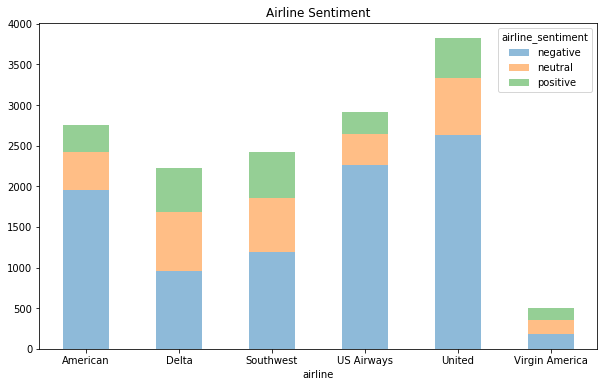

In [25]:
pd.crosstab(index = df["airline"],columns = df["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

In [29]:
features = df.iloc[:, 2].values
airline_sentiment = df.iloc[:, 0].values

In [30]:
features

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [31]:
airline_sentiment

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [32]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [33]:
processed_features


[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

In [34]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [35]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, airline_sentiment, test_size=0.2, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [39]:
predictions = text_classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995
